In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fastf1
from fastf1 import plotting
from src.utils import get_driver_telemetry_for_laps

# Enable FastF1's plotting style
plotting.setup_mpl(color_scheme='fastf1')

In [2]:
fastf1.Cache.enable_cache('./f1_cache')
fastf1.Cache.get_cache_info()

('./f1_cache', 456762169)

In [3]:
race = fastf1.get_session(2025,'Canada','Race')

In [4]:
race.load()

core           INFO 	Loading data for Canadian Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '1', '12', '81', '16', '44', '14', '27', '31', '55', '87', '22', '43', '5', '10', '6', '18', '4', '30', '23']


In [5]:
# race.get_circuit_info().corners

In [15]:
rus_car_tel = get_driver_telemetry_for_laps(race,'RUS',68,tel_type='car').add_distance()
rus_car_tel['absolute_time'] = rus_car_tel.SessionTime.apply(lambda x: x.total_seconds()) - race.session_start_time.total_seconds()
rus_subset_tel = rus_car_tel[(rus_car_tel.absolute_time < 5238) & (rus_car_tel.absolute_time > 5228)].copy()

In [16]:
# rus_subset_tel.loc[347,'Brake'] = np.True_
# rus_subset_tel.loc[354,'Brake'] = np.True_

In [17]:
ver_car_tel = get_driver_telemetry_for_laps(race,'VER',68,tel_type='car').add_distance()
ver_car_tel['absolute_time'] = ver_car_tel.SessionTime.apply(lambda x: x.total_seconds()) - race.session_start_time.total_seconds()
ver_subset_tel = ver_car_tel[(ver_car_tel.absolute_time < 5238) & (ver_car_tel.absolute_time > 5228)].copy()

In [18]:
# ver_subset_tel.loc[337,'Brake'] = np.True_
# ver_subset_tel.loc[341,'Brake'] = np.True_
# ver_subset_tel.loc[350,'Brake'] = np.True_

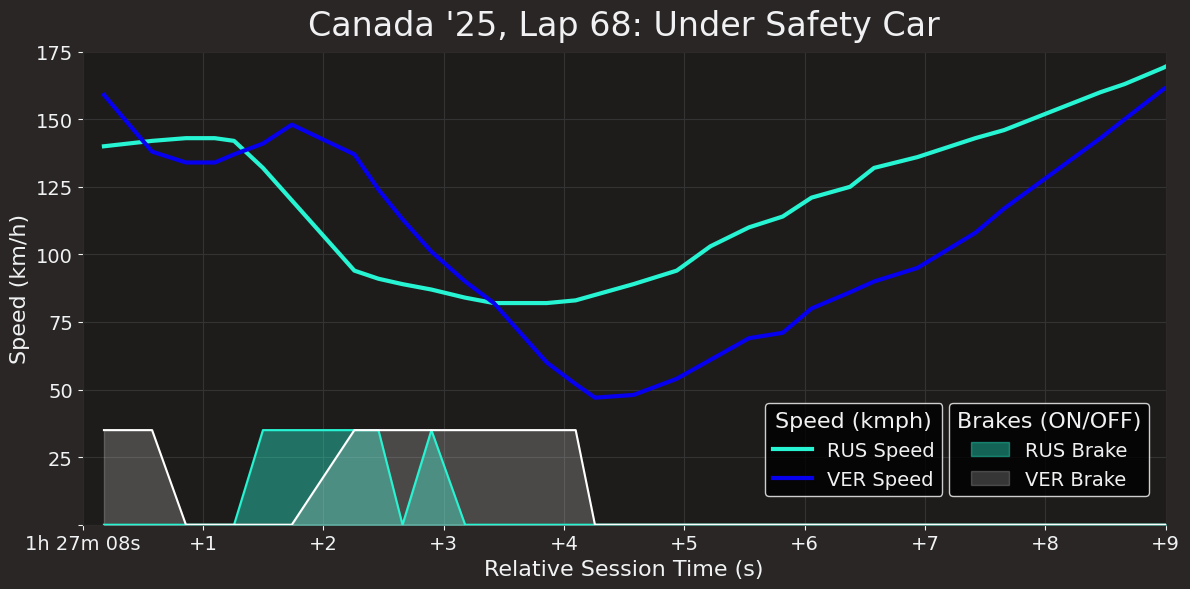

In [56]:
# Get team color
merc_color = plotting.get_team_color('Mercedes',race)
redbull_color = plotting.get_team_color('RedBull',race)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Speed on primary y-axis
ax1.plot(rus_subset_tel['absolute_time'], rus_subset_tel['Speed'], color=merc_color, lw=3, label='RUS Speed')
ax1.plot(ver_subset_tel['absolute_time'], ver_subset_tel['Speed'], color=redbull_color, lw=3, label='VER Speed')

# Plot h/v lines on the figure
# ax1.axvline(x=5229.38, ymin=0, ymax=1, color='cyan', linestyle='--', linewidth=0.5)
# ax1.axvline(x=5230, ymin=0, ymax=1, color='cyan', linestyle='--', linewidth=0.5)

# ax1.axhline(y=142, xmin=0.09, xmax=0.35, color='cyan', linestyle='--', linewidth=0.5)
# ax1.axhline(y=82, xmin=0.2, xmax=0.35, color='cyan', linestyle='--', linewidth=0.5)

# Create secondary y-axis
ax2 = ax1.twinx()

# Plot Brake on secondary y-axis
# ax2.bar(rus_subset_tel['absolute_time'],rus_subset_tel['Brake']*1,width=0.1,color='green',alpha=1,label='RUS Brake')
# ax2.bar(ver_subset_tel['absolute_time'],ver_subset_tel['Brake']*1,width=0.1,align='edge',color='w',alpha=1, label='VER Brake')

ax2.plot(rus_subset_tel['absolute_time'],rus_subset_tel['Brake']*1,color=merc_color,alpha=1)
ax2.plot(ver_subset_tel['absolute_time'],ver_subset_tel['Brake']*1,color='w',alpha=1)

# Add shaded area under each line
ax2.fill_between(rus_subset_tel['absolute_time'], rus_subset_tel['Brake'], color=merc_color, alpha=0.4, label='RUS Brake')
ax2.fill_between(ver_subset_tel['absolute_time'], ver_subset_tel['Brake'], color='w', alpha=0.2, label='VER Brake')

# Add ticks, labels and limits
ax1.set_ylabel('Speed (km/h)',fontsize=16)
ax1.set_xlabel('Relative Session Time (s)',fontsize=16)
ax1.set_xticks(range(5228,5238))
ax1.set_xticklabels(labels=['1h 27m 08s']+['+'+str(i) for i in range(1,10)],fontsize=14)
ax1.set_yticks(range(0,200,25))
ax1.set_yticklabels(labels=['']+[str(i) for i in range(25,200,25)],fontsize=14)
ax1.set_xlim([5228,5237])
ax1.set_ylim([0,175])

ax2.set_axis_off()
ax2.set_ylim([0,5])

# Add Legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
legend1 = ax1.legend(lines_1, labels_1, title='Speed (kmph)',loc=(0.63,0.06),fancybox=True,facecolor="#000000",edgecolor='w',fontsize=14)
legend2 = ax2.legend(lines_2, labels_2, title='Brakes (ON/OFF)',loc=(0.8,0.06),fancybox=True,facecolor="#000000",edgecolor='w',fontsize=14)

legend1.get_title().set_fontsize(16)
legend2.get_title().set_fontsize(16)

# Title
ax1.set_title("Canada '25, Lap 68: Under Safety Car",fontsize=24)

# Show Plot
ax1.grid(color="#333333")
plt.tight_layout()
plt.show()

In [11]:
df = rus_subset_tel[['Speed','absolute_time']].copy()

In [12]:
df['long_g_force'] = df.diff().apply(lambda x: (x['Speed']*5/18)/(x['absolute_time']*9.8),axis=1)

In [21]:
df.long_g_force.min()

np.float64(-1.4172335600919919)